In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
weights_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Weights_Heights_Predict_Heights/Training_set_heights.csv" )

In [3]:
weights_data.head()

,Weight(Pounds),Height(Inches)
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


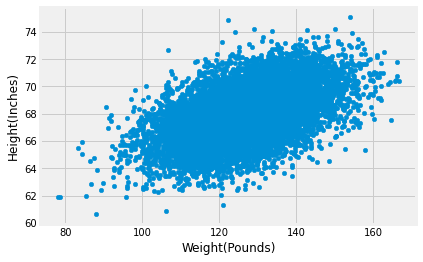

In [4]:
weights_data.plot(x='Weight(Pounds)', y='Height(Inches)', kind='scatter')

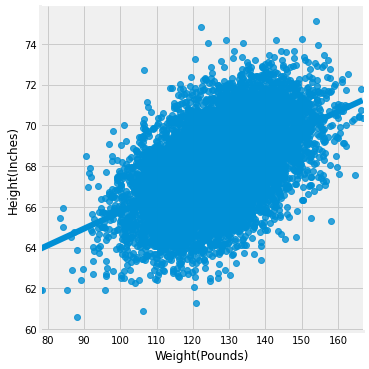

In [5]:
import seaborn as sns
sns.lmplot(x='Weight(Pounds)',y='Height(Inches)',data=weights_data,fit_reg=True)

In [6]:
weights_data.rename(columns={'Weight(Pounds)':'Weight',
                          'Height(Inches)':'Height'},inplace=True)

In [7]:
weights_data.head()

,Weight,Height
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

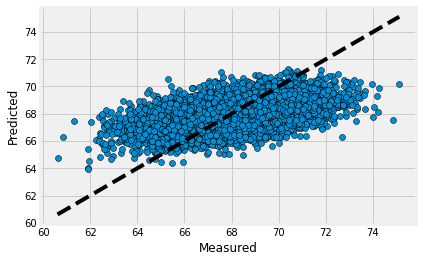

MEAN Squared Error : 2.716642242499064. (Lower the better)


In [9]:
lr = LinearRegression()
train = weights_data.loc[:, weights_data.columns != 'Height']
target = weights_data.Height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

In [11]:
X = weights_data.drop('Height', axis = 1)   # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = weights_data['Height']   

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [17]:
y_pred = regmodel.predict(X_val) 

In [18]:
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_val, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_val, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

1.3500977856152216
2.8447210637422176
1.6866300909631067


In [19]:
heights_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Weights_Heights_Predict_Heights/Testing_set_heights.csv')

In [20]:
heights_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight(Pounds)  2500 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [21]:
heights_eval.rename(columns={'Weight(Pounds)':'Weight'},inplace=True)

In [22]:
heights_eval.head()

,Weight
0,109.3832
1,131.5274
2,120.6193
3,130.3431
4,133.0872


In [23]:
predictions=regmodel.predict(heights_eval)

In [24]:
res = pd.DataFrame(predictions) 
res.index = heights_eval.index 
res.columns = ["prediction"]

from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>